# Libraries import

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data analysis for 'Ra' & 'Wz' parameters

In [32]:
df_raw = pd.read_excel('data/Ra_CNC.xlsx')
df = df_raw.copy()

In [33]:
df.head()

,α [°],θ [°],Vu [mm/s],δ [-],Fx [kN],Fr [kN],M [Nm],Wz [μm],Ra [μm],Rz [μm]
0,15,2.5,10,1.13,3.806820,34.813303,360.838194,123.5,16.58,86.28
1,15,2.5,10,1.30,4.496979,46.912708,487.337401,48.3,4.33,37.63
2,15,2.5,10,1.53,9.202321,49.436845,519.859476,45.1,3.72,32.56
3,15,2.5,20,1.13,2.952857,28.156369,396.283765,118.7,15.63,86.73
4,15,2.5,20,1.30,9.926132,42.385259,600.226120,52.6,4.48,34.46


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   α [°]      81 non-null     int64  
 1   θ [°]      81 non-null     float64
 2   Vu [mm/s]  81 non-null     int64  
 3   δ [-]      81 non-null     float64
 4   Fx [kN]    70 non-null     float64
 5   Fr [kN]    70 non-null     float64
 6   M [Nm]     70 non-null     float64
 7   Wz [μm]    70 non-null     float64
 8   Ra [μm]    70 non-null     float64
 9   Rz [μm]    70 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 6.5 KB


In [40]:
df.count()

α [°]        81
θ [°]        81
Vu [mm/s]    81
δ [-]        81
Fx [kN]      70
Fr [kN]      70
M [Nm]       70
Wz [μm]      70
Ra [μm]      70
Rz [μm]      70
dtype: int64

In [6]:
df.columns = ['α', 'θ', 'Vu', 'δ', 'Fx', 'Fr', 'M', 'Wz', 'Ra', 'Rz']
df.head()

,α,θ,Vu,δ,Fx,Fr,M,Wz,Ra,Rz
0,15,2.5,10,1.13,3.806820,34.813303,360.838194,123.5,16.58,86.28
1,15,2.5,10,1.30,4.496979,46.912708,487.337401,48.3,4.33,37.63
2,15,2.5,10,1.53,9.202321,49.436845,519.859476,45.1,3.72,32.56
3,15,2.5,20,1.13,2.952857,28.156369,396.283765,118.7,15.63,86.73
4,15,2.5,20,1.30,9.926132,42.385259,600.226120,52.6,4.48,34.46


In [7]:
df.loc[:, ['Ra', 'Wz']].isnull().sum()

Ra    11
Wz    11
dtype: int64

In [8]:
df[(df['Ra'].isnull()) & (df['Wz'].isnull())]

,α,θ,Vu,δ,Fx,Fr,M,Wz,Ra,Rz
6,15,2.5,40,1.13,NaN,NaN,NaN,NaN,NaN,NaN
7,15,2.5,40,1.30,NaN,NaN,NaN,NaN,NaN,NaN
8,15,2.5,40,1.53,NaN,NaN,NaN,NaN,NaN,NaN
17,20,2.5,40,1.53,NaN,NaN,NaN,NaN,NaN,NaN
24,25,2.5,40,1.13,NaN,NaN,NaN,NaN,NaN,NaN
25,25,2.5,40,1.30,NaN,NaN,NaN,NaN,NaN,NaN
26,25,2.5,40,1.53,NaN,NaN,NaN,NaN,NaN,NaN
54,15,7.5,10,1.13,NaN,NaN,NaN,NaN,NaN,NaN
56,15,7.5,10,1.53,NaN,NaN,NaN,NaN,NaN,NaN
63,20,7.5,10,1.13,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# czy w tym miejscu powininenm wyrzucić dane z bakującymi wierszami? 

# Heatmap

In [10]:
df.corr()

,α,θ,Vu,δ,Fx,Fr,M,Wz,Ra,Rz
α,1.000000e+00,5.026432e-16,4.479313e-17,3.891773e-16,0.334341,-0.382631,-0.061228,0.206879,0.077904,0.048843
θ,5.026432e-16,1.000000e+00,-8.958626e-17,1.749250e-15,-0.450330,-0.073569,0.494799,0.588393,0.297370,0.351749
Vu,4.479313e-17,-8.958626e-17,1.000000e+00,1.367747e-16,0.268657,0.031371,0.548962,0.143914,-0.072291,-0.018580
δ,3.891773e-16,1.749250e-15,1.367747e-16,1.000000e+00,0.549780,0.793387,0.590895,-0.459641,-0.709609,-0.762138
Fx,3.343412e-01,-4.503299e-01,2.686569e-01,5.497801e-01,1.000000,0.342935,0.305655,-0.474963,-0.650773,-0.684563
Fr,-3.826308e-01,-7.356899e-02,3.137059e-02,7.933866e-01,0.342935,1.000000,0.616864,-0.584704,-0.709641,-0.737734
M,-6.122813e-02,4.947995e-01,5.489624e-01,5.908947e-01,0.305655,0.616864,1.000000,-0.100228,-0.457382,-0.432573
Wz,2.068791e-01,5.883926e-01,1.439142e-01,-4.596413e-01,-0.474963,-0.584704,-0.100228,1.000000,0.852634,0.848113
Ra,7.790414e-02,2.973700e-01,-7.229098e-02,-7.096089e-01,-0.650773,-0.709641,-0.457382,0.852634,1.000000,0.975417
Rz,4.884314e-02,3.517486e-01,-1.858017e-02,-7.621378e-01,-0.684563,-0.737734,-0.432573,0.848113,0.975417,1.000000


Text(0.5, 1.0, 'Heatmap')

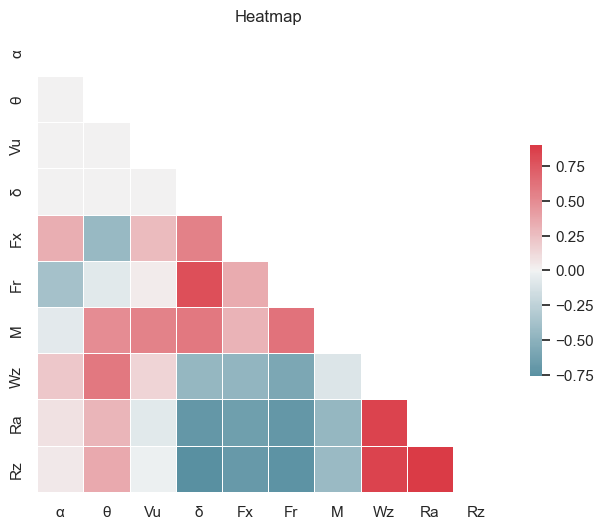

In [11]:
corr = df.corr()

sns.set(style='white')
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8,6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.9, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5})
ax.set_title('Heatmap')

C:\Users\lenovo\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

Text(0.5, 0.98, "Pairplot for 'Ra' parameter")

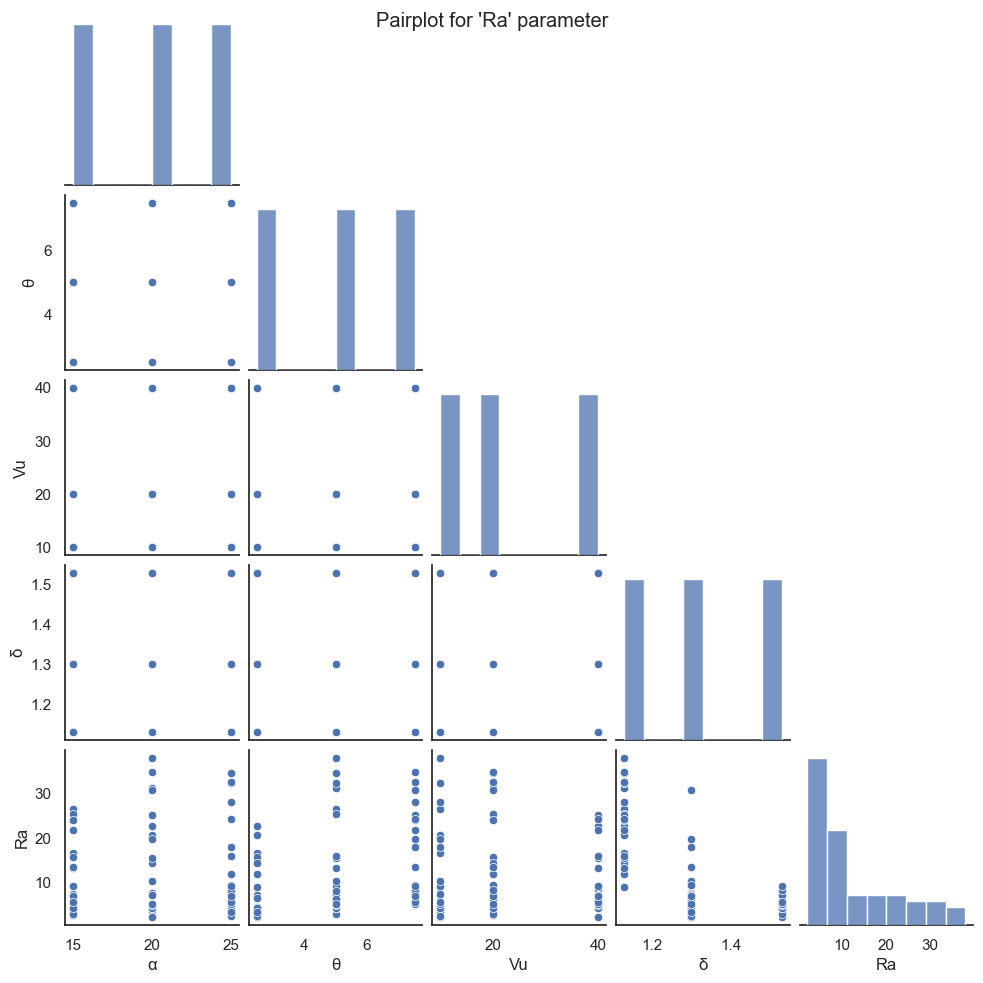

In [12]:
sns.pairplot(df[['α', 'θ', 'Vu', 'δ', 'Ra']], height=2, corner=True).fig.suptitle("Pairplot for 'Ra' parameter")

C:\Users\lenovo\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

Text(0.5, 0.98, "Pairplot for 'Wz' parameter")

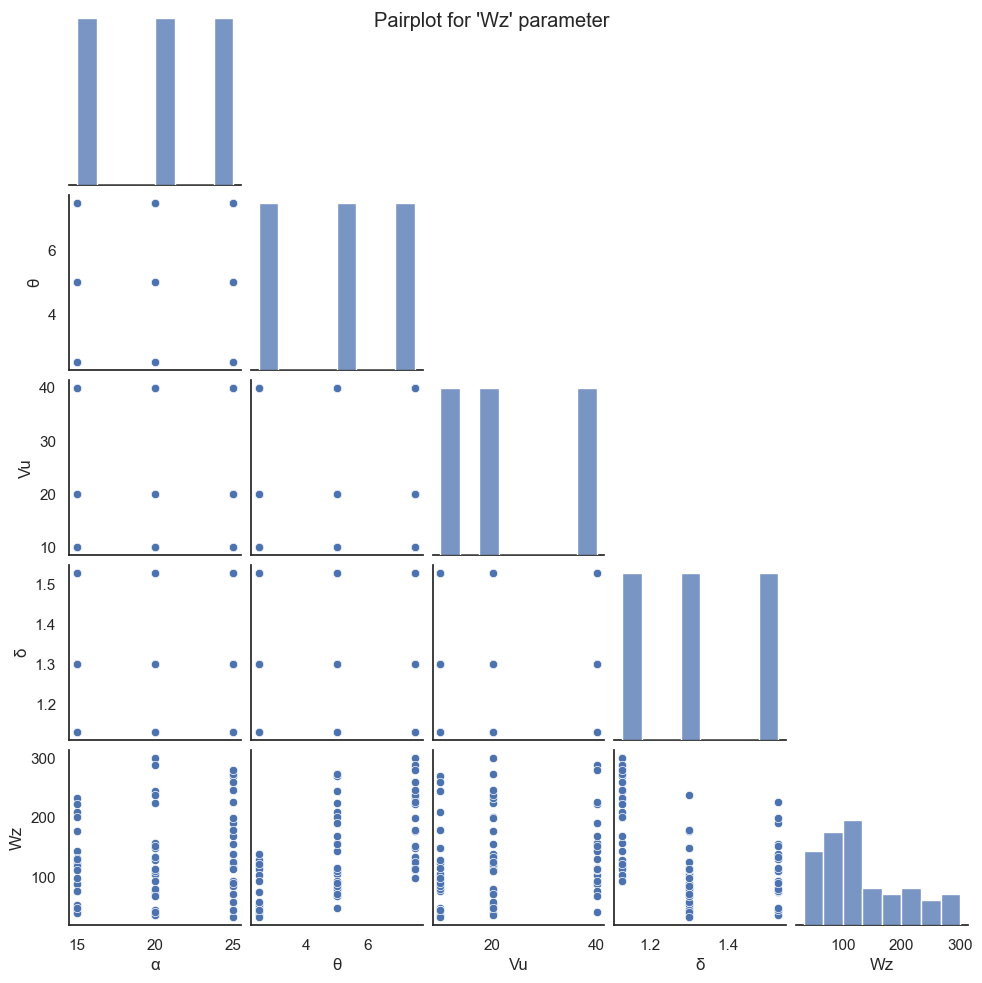

In [13]:
sns.pairplot(df[['α', 'θ', 'Vu', 'δ', 'Wz']], height=2, corner=True).fig.suptitle("Pairplot for 'Wz' parameter")

In [14]:
df = df.dropna().reset_index(drop=True)
df = df.round(2)
df.head()

,α,θ,Vu,δ,Fx,Fr,M,Wz,Ra,Rz
0,15,2.5,10,1.13,3.81,34.81,360.84,123.5,16.58,86.28
1,15,2.5,10,1.30,4.50,46.91,487.34,48.3,4.33,37.63
2,15,2.5,10,1.53,9.20,49.44,519.86,45.1,3.72,32.56
3,15,2.5,20,1.13,2.95,28.16,396.28,118.7,15.63,86.73
4,15,2.5,20,1.30,9.93,42.39,600.23,52.6,4.48,34.46


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   α       70 non-null     int64  
 1   θ       70 non-null     float64
 2   Vu      70 non-null     int64  
 3   δ       70 non-null     float64
 4   Fx      70 non-null     float64
 5   Fr      70 non-null     float64
 6   M       70 non-null     float64
 7   Wz      70 non-null     float64
 8   Ra      70 non-null     float64
 9   Rz      70 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 5.6 KB


In [30]:
df.value_counts().sum()

70